In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import LinearSVC, SVC

np.random.seed(24680)

In [3]:
def assert_is_not_none(value, error_message="Value cannot be None"):
  if value is None:
    raise AssertionError(error_message)

# Ensemble Models and Support Vector Machines Lab
## Training and comparing different algorithms

Once again, we'll work with the bank dataset. This time, the data preprocessing steps have been done for you.

The goal is to try and improve our predictions (if they can be improved at all) using different types of algorithms.

### 1. Read the data (1 point)
This time you only need to read the data. The indicator variables have been separated out for you.

Read the dataset and save it in the variable `bank_data`. The target column is `y`. Use the variables `bank_attributes` and `bank_labels` to save the attributes (explanatory variables, features, predictors), and labels (`y`).

In [4]:
bank_data = pd.read_csv("./data/bank.csv", sep=",")

bank_attributes = bank_data.drop(columns="y")
bank_labels = bank_data.y

columns = bank_attributes.columns

bank_data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
assert_is_not_none(bank_data)
assert_is_not_none(bank_attributes)
assert_is_not_none(bank_labels)

### 2. Normalize the data (1 point)
Because both forests and SVMs are sensitive to non-scaled data, we need to normalize our dataset first.

Rescale all columns in `bank_attributes` so they have mean = 0 and variance = 1. You can either look at the `sklearn` docs or do this yourself. When you're ready, overwrite the `bank_attributes` column. Make sure that you don't lose the column names in the process.

In [6]:
scaler = MinMaxScaler()
income_attributes = scaler.fit_transform(bank_attributes)

In [7]:
assert_is_not_none(bank_attributes)

### 3. Split the data (1 point)
Use the standard 70% / 30% split. Since this is a classification problem, be sure to stratify the split according to the `bank_labels`.

In [8]:
bank_attributes_train, bank_attributes_test, bank_labels_train, bank_labels_test = train_test_split(
    income_attributes,
    bank_labels,
    train_size=0.7, 
    test_size=0.3, 
    random_state=42, 
    stratify=bank_labels
)
bank_attributes_train.shape, bank_attributes_test.shape, bank_labels_train.shape, bank_labels_test.shape

((3164, 51), (1357, 51), (3164,), (1357,))

In [9]:
assert_is_not_none(bank_attributes_train)
assert_is_not_none(bank_labels_train)

assert_is_not_none(bank_attributes_test)
assert_is_not_none(bank_labels_test)

### 4. Prepare the cross-validation folds (1 point)
Use a stratified k-fold cross-validation split, with $k = 5$. Fit it to the train data. Save the trained cross-validator to the variable `k_fold`.

The data should already be shuffled. There's no need to shuffle it again.

In [10]:
k_fold = StratifiedKFold(n_splits=5, shuffle=False)
k_fold
# k_fold.fit(bank_attributes_train, bank_labels_train)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [11]:
assert_is_not_none(k_fold)

### 5. Decision Tree (2 points)
Use cross-validation to train and optimize the hyperparameters for a decision tree classifier.

Use grid search with the following grid:
* `max_depth`: 1, 5, 7, 15, 20
* `min_samples_leaf`: 2, 5, 10, 12
* `max_leaf_nodes`: 5, 10, 20

Use the most appropriate scoring metric (remember that accuracy doesn't work in this case because the data is highly imbalanced; we need something which combines precision and recall). Use the cross-validation splits you just created.

Save the grid results in `grid_search`. Save the best classifier in `tree_classifier`.

Optionally, you can print and / or visualize the cross-validation results and the best chosen parameters.

Decision tree; best score: 0.49101387340198166


[Text(0.7132352941176471, 0.9166666666666666, 'x[3] <= 0.212\ngini = 0.204\nsamples = 3164\nvalue = [2799, 365]'),
 Text(0.5441176470588235, 0.75, 'x[49] <= 0.5\ngini = 0.149\nsamples = 2909\nvalue = [2673, 236]'),
 Text(0.38235294117647056, 0.5833333333333334, 'x[45] <= 0.5\ngini = 0.119\nsamples = 2827\nvalue = [2648, 179]'),
 Text(0.23529411764705882, 0.4166666666666667, 'x[3] <= 0.113\ngini = 0.107\nsamples = 2781\nvalue = [2624, 157]'),
 Text(0.11764705882352941, 0.25, 'x[42] <= 0.5\ngini = 0.068\nsamples = 2329\nvalue = [2247, 82]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.061\nsamples = 2302\nvalue = [2230, 72]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(0.35294117647058826, 0.25, 'x[34] <= 0.5\ngini = 0.277\nsamples = 452\nvalue = [377, 75]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.34\nsamples = 309\nvalue = [242, 67]'),
 Text(0.4117647058823529, 0.08333333333333333, 'gini = 0.10

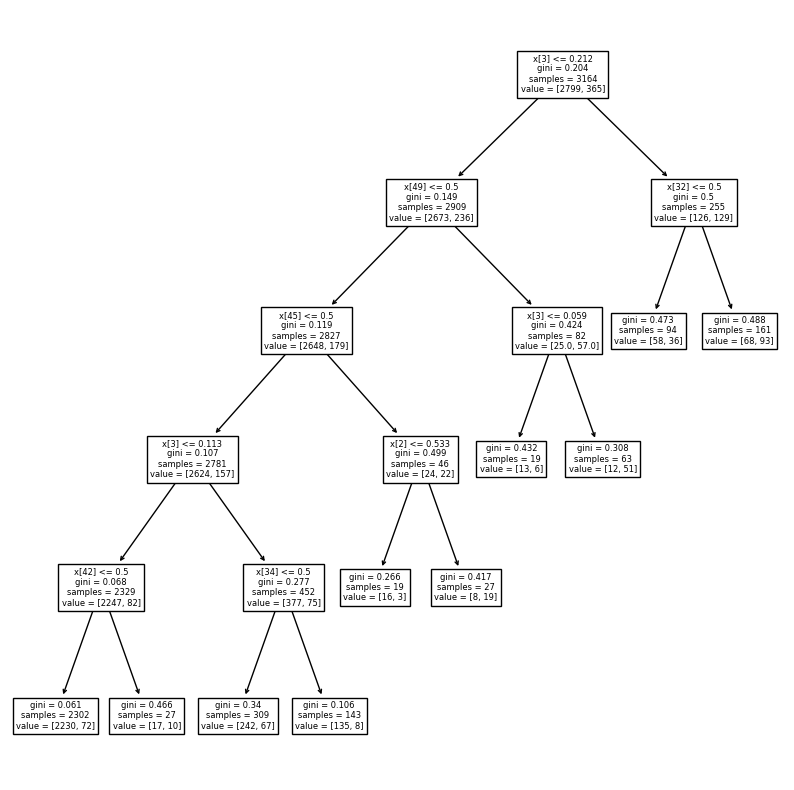

In [12]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid = {
        "max_depth": [1, 5, 7, 15, 20],
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]
    },
    scoring = make_scorer(f1_score),
    cv = k_fold
)
grid_search.fit(bank_attributes_train, bank_labels_train)

tree_classifier = grid_search.best_estimator_

print("Decision tree; best score:", grid_search.best_score_)

plt.figure(figsize = (10, 10))
plot_tree(tree_classifier)

In [13]:
assert_is_not_none(grid_search)
assert_is_not_none(tree_classifier)

### 6. Random Forest (1 point)
Use cross-validation to train and optimize the hyperparameters for a random forest classifier. Use the same technique as before.

Use the following grid:
* `n_estimators`: 100, 200, 300 
* `max_depth`: 20, 50, 100

Note that this grid is on the small side but this is mainly due to performance reasons. Also note that the training will take some time.

Save the grid results in `grid_search`. Save the best classifier in `forest_classifier`.

Optionally, you can print and / or visualize the cross-validation results and the best chosen parameters.

Due to the relatively slow training, we've chosen low values for the parameters. The performance of the random forest will be worse than the decision tree. This is not necessarily the case in general, it's due to the parameters we've chosen to try.

Random forest; best score: 0.4032583215104223


[Text(0.7132352941176471, 0.9166666666666666, 'x[3] <= 0.212\ngini = 0.204\nsamples = 3164\nvalue = [2799, 365]'),
 Text(0.5441176470588235, 0.75, 'x[49] <= 0.5\ngini = 0.149\nsamples = 2909\nvalue = [2673, 236]'),
 Text(0.38235294117647056, 0.5833333333333334, 'x[45] <= 0.5\ngini = 0.119\nsamples = 2827\nvalue = [2648, 179]'),
 Text(0.23529411764705882, 0.4166666666666667, 'x[3] <= 0.113\ngini = 0.107\nsamples = 2781\nvalue = [2624, 157]'),
 Text(0.11764705882352941, 0.25, 'x[42] <= 0.5\ngini = 0.068\nsamples = 2329\nvalue = [2247, 82]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.061\nsamples = 2302\nvalue = [2230, 72]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(0.35294117647058826, 0.25, 'x[34] <= 0.5\ngini = 0.277\nsamples = 452\nvalue = [377, 75]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.34\nsamples = 309\nvalue = [242, 67]'),
 Text(0.4117647058823529, 0.08333333333333333, 'gini = 0.10

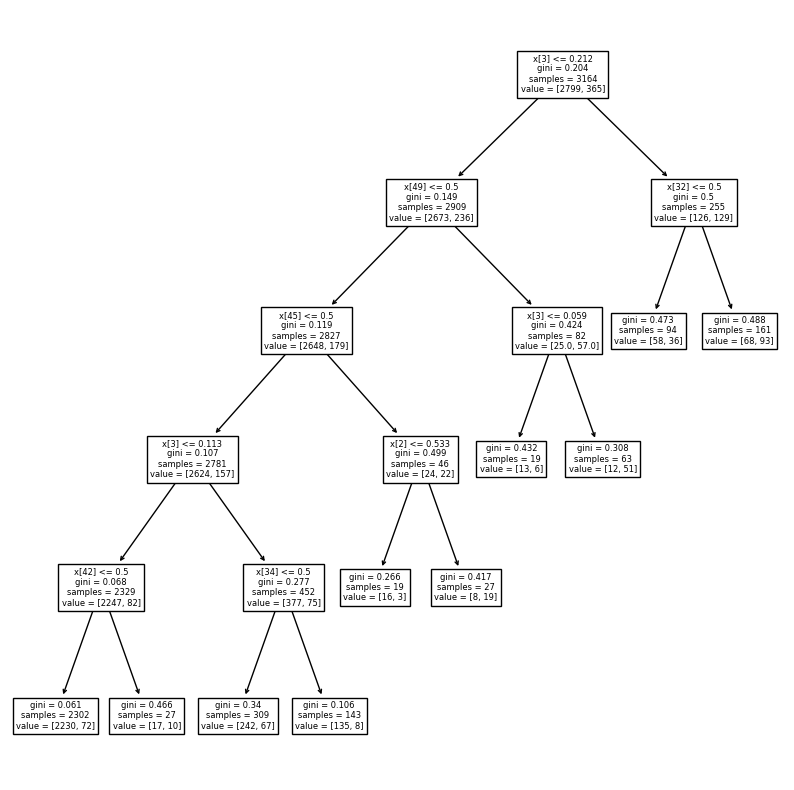

In [14]:
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid = {
        "n_estimators": [100, 200, 300 ],
        "max_depth": [20, 50, 100],
    },
    scoring = make_scorer(f1_score),
    cv = k_fold
)
grid_search.fit(bank_attributes_train, bank_labels_train)

forest_classifier = grid_search.best_estimator_

print("Random forest; best score:", grid_search.best_score_)

plt.figure(figsize = (10, 10))
plot_tree(tree_classifier)

In [15]:
assert_is_not_none(grid_search)
assert_is_not_none(forest_classifier)

### 7. Linear SVM (1 point)
Use cross-validation to train and optimize the hyperparameters for a linear support vector machine. Use the same technique as before.

Use the following grid:
* `C`: 0.1, 0.5, 0.8, 1, 1.5, 2, 6, 10, 15, 20

Note that we're choosing relatively small values for `C`. This is allowed because our data is normalized.

Save the grid results in `grid_search`. Save the best classifier in `linear_svm_classifier`. There are many ways to create a linear SVM classifier. Look up the `sklearn` docs to choose the fastest one (in terms of performance).

Optionally, you can print and / or visualize the cross-validation results and the best chosen parameters.

In [16]:
grid_search = GridSearchCV(
    LinearSVC(),
    param_grid = {
        "C": [0.1, 0.5, 0.8, 1, 1.5, 2, 6, 10, 15, 20],
    },
    scoring = make_scorer(f1_score),
    cv = k_fold
)
grid_search.fit(bank_attributes_train, bank_labels_train)

linear_svm_classifier = grid_search.best_estimator_

print("Linear SVM; best score:", grid_search.best_score_)

c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.

Linear SVM; best score: 0.43774259696589796


c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Boyko Boev\SoftUni-Machine-Learning-Septemb

In [17]:
assert_is_not_none(grid_search)
assert_is_not_none(linear_svm_classifier)

### 8. Gaussian SVM (1 point)
Use cross-validation to train and optimize the hyperparameters for an SVM with a Gaussian kernel. Use the same technique as before.

Use the following grid:
* `C`: 10, 15, 20, 50, 200
* `gamma`: 0.001, 0.01, 0.1, 0.2

Note that this time we give larger values of `C` because the governing parameter here is `gamma`.

Save the grid results in `grid_search`. Save the best classifier in `gaussian_svm_classifier`.

Optionally, you can print and / or visualize the cross-validation results and the best chosen parameters.

In [21]:
grid_search = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid = {
        "C": [10, 15, 20, 50, 200],
        "gamma": [0.001, 0.01, 0.1, 0.2]
    },
    scoring = make_scorer(f1_score),
    cv = k_fold
)
grid_search.fit(bank_attributes_train, bank_labels_train)

gaussian_svm_classifier = grid_search.best_estimator_

print("Gaussian SVM; best score:", grid_search.best_score_)

Gaussian SVM; best score: 0.4759091527267782


In [22]:
assert_is_not_none(grid_search)
assert_is_not_none(gaussian_svm_classifier)

### 9. Compare performance on the testing data (1 point)
Now that you've trained all your models, you've got to select the best one. This should be done on the testing data.

Use the appropriate scoring metric to get the testing scores for all your models. Don't forget to pass the **testing**, not the training data. Save all scores.

Choose the best classifier, based on these scores (the one with the highest test score). Of course, this is not enough. We need to look at ROC curves, track performance through other measures, debug the sources of variance in testing results, try more hyperparameters, etc. However, this is enough for an introductory lab :).

Optionally, you can think of combining them into a boosted model but this is out of the scope of this lab.

In [23]:
tree_classifier_score = tree_classifier.score(bank_attributes_test, bank_labels_test)
forest_classifier_score = forest_classifier.score(bank_attributes_test, bank_labels_test)
linear_svm_classifier_score = linear_svm_classifier.score(bank_attributes_test, bank_labels_test)
gaussian_svm_classifier_score = gaussian_svm_classifier.score(bank_attributes_test, bank_labels_test)

print("Testing scores:")
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)
print("Linear SVM:", linear_svm_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)

Testing scores:
Decision tree: 0.8931466470154753
Random forest: 0.8953574060427414
Linear SVM: 0.894620486366986
Gaussian SVM: 0.8806190125276345
